# Spectral Loss for Fundamental Mode of N3 as outer ring moves away

Here we compare the spectral loss for the N3 configuration to that of N3 as we increase the buffer air region of N3. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


First we load and visualize the spectral loss for N1

# Initialize

In [8]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
outer = 'h2'
nu = 1

N2betas = np.load('data/N2_base.npy')

In [22]:
N2betas = np.load('data/N2_base.npy')
N1betas = np.load('../N2_varying_thickness_studies/data/N1_wls.npy')

In [15]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x: n_air]
mats = ['air', 'glass','air', 'glass', 'air']
maxhs = [100 for r in mats]

d = 4.0775e-05
ts = [d , 1e-5, d, 1e-5, 2e-5]


In [10]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

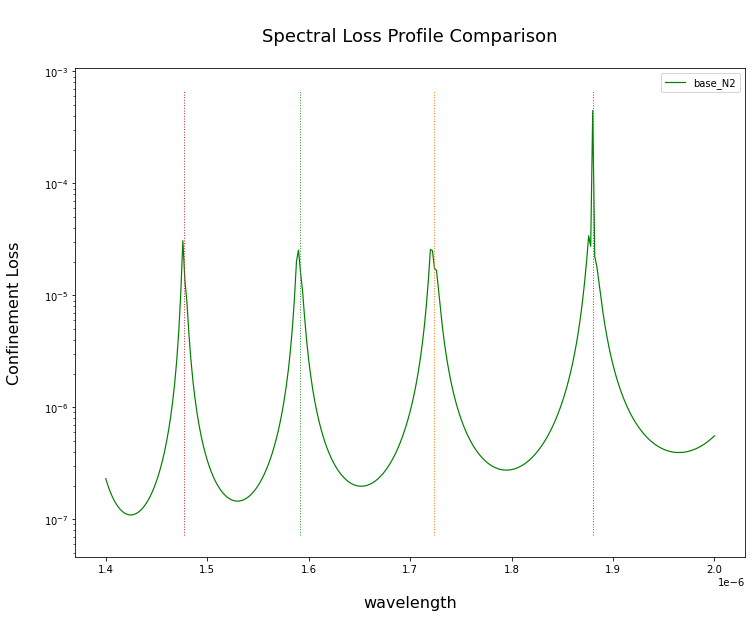

In [56]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N2betas.imag, color='green', linewidth=1.2, label='base_N2')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Base N3 Study

In [17]:
betas0 = np.zeros_like(wls, dtype=complex)

for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas0[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.33280465337658-1.3842981429684843e-08j) . Residual of determinant:  1.4115873647173898e-07 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23672187801269-1.042392675769479e-08j) . Residual of determinant:  6.076824088204324e-08 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.1409145823647-8.142178914917532e-09j) . Residual of determinant:  2.279216498076613e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.04538117374484-6.567307098224099e-09j) . Residual of determinant:  9.437646640742459e-08 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95012018222458-5.450499843776147e-09j) . Residual of determ

scaling guess: 1
scaling guess: 2
Scaled beta:  (63.77949379805676-0.001724819721328168j) . Residual of determinant:  2.7739675251276772e-14 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.69394906910109-4.688411238187526e-05j) . Residual of determinant:  3.923492656807233e-12 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (63.6073174822573-8.243800032728124e-06j) . Residual of determinant:  2.9163694919461787e-10 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.52130766128221-2.2442974770184627e-06j) . Residual of determinant:  2.0512722010440433e-09 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

Scaled beta:  (63.43565599909905-8.307142221921535e-07j) . Residual of determinant:  1.1267191566979558e-10 


     --------------------  

Scaled beta:  (60.50300368955946-1.2013039815319536e-08j) . Residual of determinant:  2.1314252937685656e-07 


     --------------------  81/301: wavelength: 1.5599999999999999e-06  --------------------     

Scaled beta:  (60.425407842179496-1.4597142816864501e-08j) . Residual of determinant:  2.4097003272452385e-07 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.34800950434718-1.8107400494786477e-08j) . Residual of determinant:  3.807518630361341e-08 


     --------------------  83/301: wavelength: 1.564e-06  --------------------     

Scaled beta:  (60.27080765287615-2.297986538303392e-08j) . Residual of determinant:  4.75351960815995e-08 


     --------------------  84/301: wavelength: 1.566e-06  --------------------     

Scaled beta:  (60.19380118914594-2.991539526712885e-08j) . Residual of determinant:  6.75036391680562e-08 


     --------------------  85/301: wavelength: 1.5679999999999999e-06  ---------

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (57.61791026935797-8.147278186049339e-09j) . Residual of determinant:  2.529759270689253e-07 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

Scaled beta:  (57.547534727172916-7.499487135107965e-09j) . Residual of determinant:  1.913688175593393e-07 


     --------------------  121/301: wavelength: 1.64e-06  --------------------     

Scaled beta:  (57.47733109818856-6.981483876418108e-09j) . Residual of determinant:  1.1575531323945091e-07 


     --------------------  122/301: wavelength: 1.642e-06  --------------------     

Scaled beta:  (57.40729870320095-6.569684987579152e-09j) . Residual of determinant:  3.2146776239308937e-07 


     --------------------  123/301: wavelength: 1.6439999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.337436872484-6.2465228105998684e-09j) . Residual of determinant:  6.336435945469496e-

Scaled beta:  (54.93030595979723-6.2131745929225445e-06j) . Residual of determinant:  3.5948161052789136e-11 


     --------------------  160/301: wavelength: 1.718e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (54.866107694089685-1.7708674600536294e-05j) . Residual of determinant:  4.225927537397208e-11 


     --------------------  161/301: wavelength: 1.7199999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.801860378748195-6.980867482886479e-05j) . Residual of determinant:  2.6923797243423974e-11 


     --------------------  162/301: wavelength: 1.7219999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (54.74456014138849-0.0004015065414058264j) . Residual of determinant:  2.7373311359283553e-11 


     --------------------  163/301: wavelength: 1.724e-06  --------------------     

Scaled beta:  (54.67897246318061-0.0030430472095306456j) . Residual of determinant:  5.81709250796

Scaled beta:  (52.54212818503853-8.572544388842148e-09j) . Residual of determinant:  1.709457620484874e-07 


     --------------------  199/301: wavelength: 1.7959999999999998e-06  --------------------     

Scaled beta:  (52.48359519074722-8.511061340850074e-09j) . Residual of determinant:  1.2692883116544717e-07 


     --------------------  200/301: wavelength: 1.798e-06  --------------------     

Scaled beta:  (52.42519240432895-8.505180643530417e-09j) . Residual of determinant:  3.474115327996975e-07 


     --------------------  201/301: wavelength: 1.8e-06  --------------------     

Scaled beta:  (52.36691937140987-8.55424521478626e-09j) . Residual of determinant:  2.610527856744025e-07 


     --------------------  202/301: wavelength: 1.8019999999999999e-06  --------------------     

Scaled beta:  (52.30877563983647-8.658842126192773e-09j) . Residual of determinant:  8.494235999565266e-08 


     --------------------  203/301: wavelength: 1.804e-06  --------------------   

Scaled beta:  (50.233778829379396-0.0007102837910449661j) . Residual of determinant:  2.741444020885132e-13 


     --------------------  240/301: wavelength: 1.8779999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (50.18881776999809-0.00041848358407970917j) . Residual of determinant:  1.7314315388015028e-13 


     --------------------  241/301: wavelength: 1.8799999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (50.144009347283806-0.0014837421481384751j) . Residual of determinant:  8.100084071531588e-13 


     --------------------  242/301: wavelength: 1.882e-06  --------------------     

Scaled beta:  (50.08887995826197-0.0003610230740055713j) . Residual of determinant:  2.2194516828399595e-11 


     --------------------  243/301: wavelength: 1.8839999999999999e-06  --------------------     

Scaled beta:  (50.0

scaling guess: 1
Scaled beta:  (48.238569991451286-1.4996075300644976e-08j) . Residual of determinant:  2.8118285088494577e-07 


     --------------------  279/301: wavelength: 1.956e-06  --------------------     

Scaled beta:  (48.189223151017615-1.4543012771193366e-08j) . Residual of determinant:  2.240327371117927e-08 


     --------------------  280/301: wavelength: 1.9579999999999997e-06  --------------------     

Scaled beta:  (48.13997719514661-1.4173373655874941e-08j) . Residual of determinant:  9.610301638785812e-08 


     --------------------  281/301: wavelength: 1.96e-06  --------------------     

Scaled beta:  (48.09083179745508-1.3879992049803656e-08j) . Residual of determinant:  2.499977108070204e-09 


     --------------------  282/301: wavelength: 1.962e-06  --------------------     

Scaled beta:  (48.0417866338739-1.3657246051282285e-08j) . Residual of determinant:  2.116926707562783e-08 


     --------------------  283/301: wavelength: 1.9639999999999997e-06

In [58]:
# np.save('data/N3base', betas0)

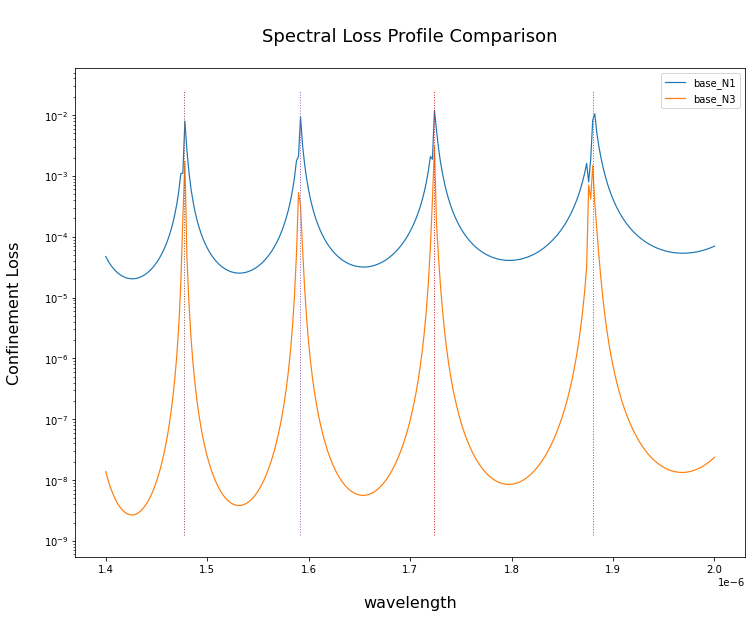

In [57]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

# ax.plot(wls, -N2betas.imag, linewidth=1.2, label='base_N2')
ax.plot(wls, -N1betas.imag, linewidth=1.2, label='base_N1')
ax.plot(wls, -betas0.imag, linewidth=1.2, label='base_N3')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Make air region larger

This is without filtering out the higher mode though, which I need to do, but this gets it start being set up.

In [26]:
betas1 = np.zeros_like(wls, dtype=complex)

t1 = 1.5
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]


for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33427668497866-2.077247418183894e-06j) . Residual of determinant:  7.978006245484456e-08 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23819580733799-1.8095954490996535e-06j) . Residual of determinant:  1.9690132267502321e-07 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.1423904315713-1.6047379410539687e-06j) . Residual of determinant:  1.8828386818830307e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04685896224875-1.445528818855031e-06j) . Residual of determinant:  3.3819470015224585e-07 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.9515999266675-1.3204473884967593e-06j) . Residual of determinant:  8.100774850167393e-08 


scaling guess: 1
scaling guess: 2
Scaled beta:  (63.78136531716001-0.0006882702434020045j) . Residual of determinant:  2.290675673237937e-12 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.69532191424809-9.256079015146461e-05j) . Residual of determinant:  4.129675129046006e-11 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

Scaled beta:  (63.60883349460634-4.2817509277346714e-05j) . Residual of determinant:  8.641145539693993e-10 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.52285707828055-2.3979165456585636e-05j) . Residual of determinant:  4.42608096030408e-09 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (63.43721607002927-1.5222596816735485e-05j) . Residual of determinant:  3.1999117177644544e-09 


     --------------------  

scaling guess: 1
Scaled beta:  (60.660423590899555-1.7782986991520185e-06j) . Residual of determinant:  6.011528684676069e-08 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

Scaled beta:  (60.58243197433754-1.927661264018249e-06j) . Residual of determinant:  3.385044800703084e-08 


     --------------------  80/301: wavelength: 1.558e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (60.50463979215379-2.1079192901561e-06j) . Residual of determinant:  4.6547278053404483e-08 


     --------------------  81/301: wavelength: 1.5599999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (60.4270461197579-2.32692568378308e-06j) . Residual of determinant:  1.5804135897616543e-07 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.34964999798361-2.5953212397788367e-06j) 

scaling guess: 1
scaling guess: 2
Scaled beta:  (57.83178856499842-2.0362175047591004e-06j) . Residual of determinant:  3.10201713528931e-07 


     --------------------  117/301: wavelength: 1.6319999999999998e-06  --------------------     

Scaled beta:  (57.76089505657964-1.9212462532105464e-06j) . Residual of determinant:  2.3605639427549085e-08 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

Scaled beta:  (57.69017558432933-1.824673421940507e-06j) . Residual of determinant:  1.742443630353344e-07 


     --------------------  119/301: wavelength: 1.6359999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.6196294272683-1.7436684854262815e-06j) . Residual of determinant:  9.850638128867955e-08 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

Scaled beta:  (57.54925588081217-1.6760124175644375e-06j) . Residual of determinant:  5.076596445223014e-08 


     --------

scaling guess: 1
Scaled beta:  (55.18984292627309-1.342761746702869e-05j) . Residual of determinant:  8.147503651555392e-10 


     --------------------  156/301: wavelength: 1.71e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (55.12522980484801-1.729527617843751e-05j) . Residual of determinant:  1.0623359035568123e-09 


     --------------------  157/301: wavelength: 1.7119999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.06075397719495-2.3119968486841624e-05j) . Residual of determinant:  1.9977839978304925e-11 


     --------------------  158/301: wavelength: 1.714e-06  --------------------     

Scaled beta:  (54.99640861513891-3.2450545074406254e-05j) . Residual of determinant:  1.157391415954922e-10 


     --------------------  159/301: wavelength: 1.716e-06  --------------------     

Scaled beta:  (54.93218235866806-4.8756153635696e-05j) . Residual of determinant:  2.1153690360607136e-11 


     ------------------

Scaled beta:  (52.89795870118701-2.052835138059525e-06j) . Residual of determinant:  2.3686477807143922e-07 


     --------------------  193/301: wavelength: 1.7839999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.83863676533865-2.006401960674969e-06j) . Residual of determinant:  2.3348141188388408e-07 


     --------------------  194/301: wavelength: 1.786e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.77944783235719-1.968187038077234e-06j) . Residual of determinant:  1.0110453855590879e-07 


     --------------------  195/301: wavelength: 1.7879999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.72039142733968-1.9375578942275667e-06j) . Residual of determinant:  7.133001523432599e-09 


     --------------------  196/301: wavelength: 1.7899999999999998e-06  --------------------     

Scaled beta:  (52.6614670798289-1.9140117314145965e-06j) . Residual of determinant:  1.7037425369318097e-08 


     ------

Scaled beta:  (50.62425655358846-1.7708357807510465e-05j) . Residual of determinant:  1.5238800677028698e-09 


     --------------------  233/301: wavelength: 1.8639999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.56987590210564-2.189445501683895e-05j) . Residual of determinant:  1.4106015347817025e-09 


     --------------------  234/301: wavelength: 1.8659999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (50.51560106444066-2.7766238379049496e-05j) . Residual of determinant:  9.400645326653312e-11 


     --------------------  235/301: wavelength: 1.868e-06  --------------------     

Scaled beta:  (50.46142782282622-3.634864350545733e-05j) . Residual of determinant:  8.55913527718164e-11 


     --------------------  236/301: wavelength: 1.8699999999999999e-06  --------------------     

Scaled beta:  (50.40734988557054-4.959

Scaled beta:  (48.6893217247898-3.31925165728418e-06j) . Residual of determinant:  1.0205128839985689e-07 


     --------------------  270/301: wavelength: 1.938e-06  --------------------     

Scaled beta:  (48.63905369299752-3.190963581622941e-06j) . Residual of determinant:  6.827233867659491e-08 


     --------------------  271/301: wavelength: 1.94e-06  --------------------     

Scaled beta:  (48.588889643622224-3.0776653729211263e-06j) . Residual of determinant:  1.0729866536426271e-08 


     --------------------  272/301: wavelength: 1.9419999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (48.53882921345172-2.9776843829569166e-06j) . Residual of determinant:  5.5311526527561334e-09 


     --------------------  273/301: wavelength: 1.944e-06  --------------------     

Scaled beta:  (48.48887204559417-2.889613772496102e-06j) . Residual of determinant:  4.7779624615623104e-08 


     --------------------  274/301: wavelength: 1.9459999999999997e-06  

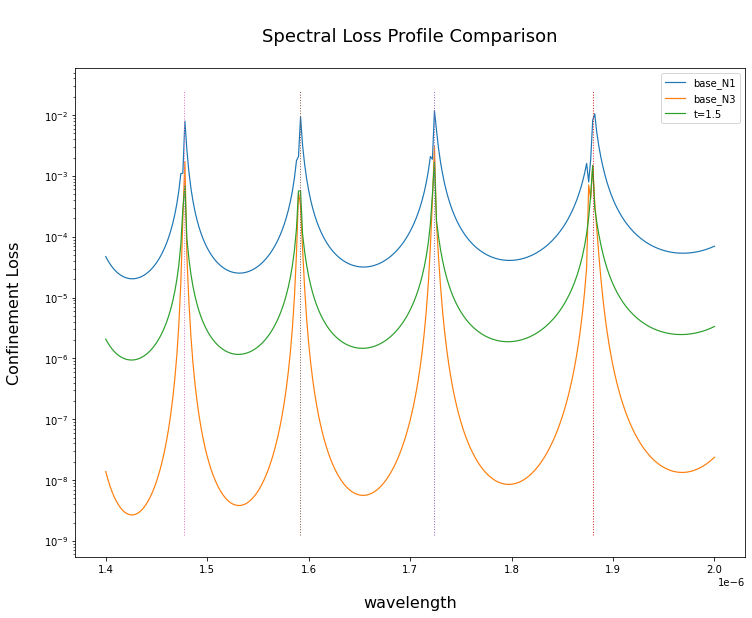

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N1betas.imag, linewidth=1.2, label='base_N1')
ax.plot(wls, -betas0.imag, linewidth=1.2, label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=1.5')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')



# More air


In [40]:
betas2 = np.zeros_like(wls, dtype=complex)

t1 = 3
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas1
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33419645373168-1.0676194573612842e-06j) . Residual of determinant:  2.4891293524429502e-08 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.23812239867185-9.273469756804848e-07j) . Residual of determinant:  2.1393535468482064e-07 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14232297348603-8.20334457757415e-07j) . Residual of determinant:  5.271314225999713e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04679678446317-7.373711957277424e-07j) . Residual of determinant:  6.233030060544852e-07 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

scaling guess: 1
Scaled beta:  (66.9515425067846-6.723046452222544e-07j) . Residual of determinant:  5.7533435

scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
Scaled beta:  (63.78042198916858-0.00041047172718016676j) . Residual of determinant:  2.7930381360545328e-14 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.6947853748849-5.9948548429470765e-05j) . Residual of determinant:  1.4429779972501482e-10 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.60845413890645-2.568833137754919e-05j) . Residual of determinant:  1.7534457229717716e-10 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.52256962682278-1.3663643401578763e-05j) . Residual of determinant:  2.716405790453953e-10 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

scaling guess: 1
Scaled bet

Scaled beta:  (60.58244851902976-9.601780799641136e-07j) . Residual of determinant:  6.539159384627449e-10 


     --------------------  80/301: wavelength: 1.558e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.50466142233308-1.048920060231583e-06j) . Residual of determinant:  2.4645627846464945e-07 


     --------------------  81/301: wavelength: 1.5599999999999999e-06  --------------------     

Scaled beta:  (60.42707329812666-1.1567112166928142e-06j) . Residual of determinant:  1.3851729212173822e-07 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.349683284516324-1.2887655555441735e-06j) . Residual of determinant:  7.469497878527389e-08 


     --------------------  83/301: wavelength: 1.564e-06  --------------------     

Scaled beta:  (60.2724904975659-1.4522752849112984e-06j) . Residual of determinant:  7.3030726769075e-08 


     --------------------  84/301: wavelength: 1.566e-06  ------

Scaled beta:  (57.831715834306365-1.0392758172617442e-06j) . Residual of determinant:  6.723772843351885e-08 


     --------------------  117/301: wavelength: 1.6319999999999998e-06  --------------------     

Scaled beta:  (57.76082668602659-9.791374895747417e-07j) . Residual of determinant:  6.878894524006534e-08 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

Scaled beta:  (57.690111321196106-9.286440220651163e-07j) . Residual of determinant:  1.8825148440794773e-08 


     --------------------  119/301: wavelength: 1.6359999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (57.619569059225384-8.862849462515893e-07j) . Residual of determinant:  4.962991684539892e-07 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.54919922970481-8.508785721552016e-07j) . Residual of determinant:  5.845693276027143e-08 


     ------

Scaled beta:  (55.189992414412785-6.626994394503777e-06j) . Residual of determinant:  3.0328997987772174e-09 


     --------------------  156/301: wavelength: 1.71e-06  --------------------     

Scaled beta:  (55.1254044246844-8.548226111504706e-06j) . Residual of determinant:  1.4562604484866734e-10 


     --------------------  157/301: wavelength: 1.7119999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.06096014158733-1.1462661308614902e-05j) . Residual of determinant:  1.3975983352628223e-09 


     --------------------  158/301: wavelength: 1.714e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.996655449915686-1.618203867391477e-05j) . Residual of determinant:  6.62418609765014e-11 


     --------------------  159/301: wavelength: 1.716e-06  --------------------     

Scaled beta:  (54.93248335411342-2.455412783930473e-05j) . Residual of determinant:  4.492396262104851e-12 


     --------------------  160/301: wavelength: 1.718e-0

Scaled beta:  (52.779395627757815-9.96800829412993e-07j) . Residual of determinant:  2.5298977808447036e-08 


     --------------------  195/301: wavelength: 1.7879999999999999e-06  --------------------     

Scaled beta:  (52.72034248287581-9.804057086702111e-07j) . Residual of determinant:  2.3951826423802327e-07 


     --------------------  196/301: wavelength: 1.7899999999999998e-06  --------------------     

Scaled beta:  (52.66142134056761-9.676497933818354e-07j) . Residual of determinant:  4.775785104765397e-07 


     --------------------  197/301: wavelength: 1.792e-06  --------------------     

Scaled beta:  (52.60263174637946-9.583217867181438e-07j) . Residual of determinant:  4.235374023120893e-08 


     --------------------  198/301: wavelength: 1.7939999999999999e-06  --------------------     

Scaled beta:  (52.54397324866846-9.522625640937953e-07j) . Residual of determinant:  1.0270502143556496e-07 


     --------------------  199/301: wavelength: 1.79599999999999

Scaled beta:  (50.570081291762804-1.0838736904015754e-05j) . Residual of determinant:  3.450717021681596e-10 


     --------------------  234/301: wavelength: 1.8659999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.515836012892436-1.3787974531243154e-05j) . Residual of determinant:  1.2224529047816775e-09 


     --------------------  235/301: wavelength: 1.868e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (50.45926404371583-3.4630114199185413e-06j) . Residual of determinant:  1.7170429480515574e-10 


     --------------------  236/301: wavelength: 1.8699999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.40766610853555-2.4932242621676972e-05j) . Residual of determinant:  4.816471241400595e-10 


     --------------------  237/301: wavelength: 1.8719999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (5

Scaled beta:  (48.58880332011633-1.5716112880856697e-06j) . Residual of determinant:  5.497109360583762e-08 


     --------------------  272/301: wavelength: 1.9419999999999998e-06  --------------------     

Scaled beta:  (48.53874683367542-1.5188424116650845e-06j) . Residual of determinant:  1.3593812418936077e-08 


     --------------------  273/301: wavelength: 1.944e-06  --------------------     

scaling guess: 1
Scaled beta:  (48.488793473353915-1.4723411778697043e-06j) . Residual of determinant:  1.6579145256204382e-07 


     --------------------  274/301: wavelength: 1.9459999999999997e-06  --------------------     

Scaled beta:  (48.43894290385105-1.431467732974706e-06j) . Residual of determinant:  1.5034442307128151e-07 


     --------------------  275/301: wavelength: 1.948e-06  --------------------     

scaling guess: 1
Scaled beta:  (48.38919479308011-1.39568235269897e-06j) . Residual of determinant:  1.465766339875943e-07 


     --------------------  276/301: wave

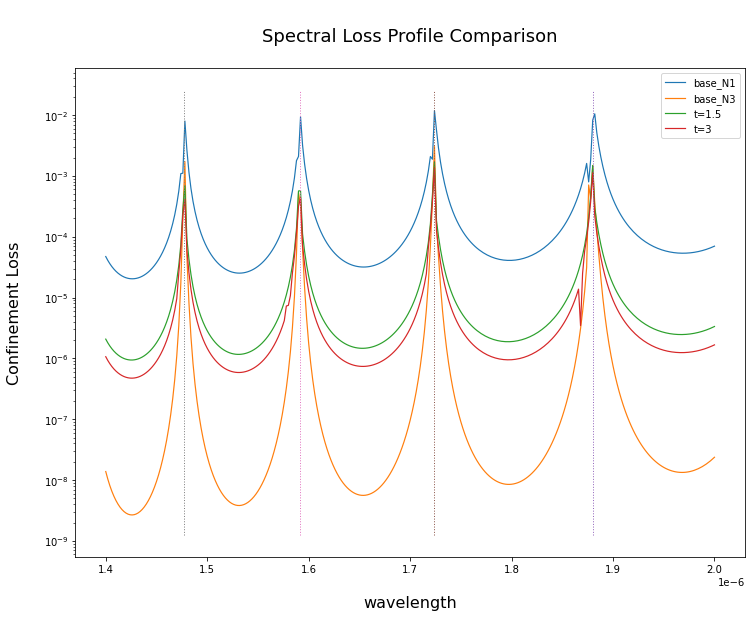

In [41]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N1betas.imag, linewidth=1.2, label='base_N1')
ax.plot(wls, -betas0.imag, linewidth=1.2, label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=1.5')
ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=3')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Even more

In [48]:
betas3 = np.zeros_like(wls, dtype=complex)

t1 = 7
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas2
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas3[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33349559920272-5.739132149430674e-07j) . Residual of determinant:  4.886233785483764e-08 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23742390817148-4.976824379348843e-07j) . Residual of determinant:  2.7499938276900604e-08 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14162644384686-4.396020105486892e-07j) . Residual of determinant:  1.145691080311917e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.04610190335961-3.946182734335329e-07j) . Residual of determinant:  4.658803171046432e-08 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95084902943418-3.5936113597970906e-07j) . Residual of determinant:  3.2352127328445657e-07 



scaling guess: 4
scaling guess: 5
Scaled beta:  (63.77976347032856-0.0003976217917485852j) . Residual of determinant:  9.854740574933395e-14 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.694965849719324-2.0185220541570636e-05j) . Residual of determinant:  1.2593111963057328e-10 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.607015319403544-1.3054948362032414e-05j) . Residual of determinant:  4.15645776147102e-12 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.52127859212504-5.32098297816641e-06j) . Residual of determinant:  1.4034250496758005e-10 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.43617882591435-4.555252800474647e-06j) . Residual of determinant:  6.276419902250572e-10 


     -------------------- 

Scaled beta:  (60.42635159212939-6.056850596634343e-07j) . Residual of determinant:  4.0132175121474475e-09 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.34896387537252-6.739692934913818e-07j) . Residual of determinant:  1.0332791561859824e-08 


     --------------------  83/301: wavelength: 1.564e-06  --------------------     

Scaled beta:  (60.27177376440337-7.584186659414822e-07j) . Residual of determinant:  5.4556644757754916e-08 


     --------------------  84/301: wavelength: 1.566e-06  --------------------     

Scaled beta:  (60.19478043444749-8.641982110794836e-07j) . Residual of determinant:  4.632028127593141e-08 


     --------------------  85/301: wavelength: 1.5679999999999999e-06  --------------------     

Scaled beta:  (60.11798304411226-9.987455394782056e-07j) . Residual of determinant:  1.0392293773440482e-08 


     --------------------  86/301: wavelength: 1.57e-06  --------------------   

scaling guess: 1
Scaled beta:  (57.61876668794662-4.7301705699203906e-07j) . Residual of determinant:  2.3692047744218502e-07 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

Scaled beta:  (57.54839776586419-4.5374761794959247e-07j) . Residual of determinant:  9.505818356372684e-08 


     --------------------  121/301: wavelength: 1.64e-06  --------------------     

Scaled beta:  (57.478200545543466-4.3773282642876323e-07j) . Residual of determinant:  5.948564332770113e-09 


     --------------------  122/301: wavelength: 1.642e-06  --------------------     

Scaled beta:  (57.40817438467069-4.2457195002432184e-07j) . Residual of determinant:  1.5043891779570397e-07 


     --------------------  123/301: wavelength: 1.6439999999999998e-06  --------------------     

Scaled beta:  (57.33831864605824-4.139497961435398e-07j) . Residual of determinant:  3.363937640974836e-09 


     --------------------  124/301: wavelength: 1.646e-06

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (54.86731800163264-2.980443458222758e-05j) . Residual of determinant:  6.8778399186648015e-12 


     --------------------  161/301: wavelength: 1.7199999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.80336742590915-6.242922620336285e-05j) . Residual of determinant:  3.380770382358012e-13 


     --------------------  162/301: wavelength: 1.7219999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
Scaled beta:  (54.735641797282824-0.00028372153944095606j) . Residual of determinant:  1.9873319722357012e-13 


     --------------------  163/301: wavelength: 1.724e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled b

scaling guess: 1
Scaled beta:  (52.4845798005901-5.036339107507589e-07j) . Residual of determinant:  1.0366822325509494e-07 


     --------------------  200/301: wavelength: 1.798e-06  --------------------     

Scaled beta:  (52.426182783428985-5.03418083629308e-07j) . Residual of determinant:  2.917183386396686e-08 


     --------------------  201/301: wavelength: 1.8e-06  --------------------     

Scaled beta:  (52.3679155258314-5.048241941966414e-07j) . Residual of determinant:  2.7446778441278376e-09 


     --------------------  202/301: wavelength: 1.8019999999999999e-06  --------------------     

Scaled beta:  (52.30977759064698-5.078542018807655e-07j) . Residual of determinant:  4.552436888883832e-08 


     --------------------  203/301: wavelength: 1.804e-06  --------------------     

Scaled beta:  (52.2517685427441-5.125308064947683e-07j) . Residual of determinant:  7.38067717879495e-08 


     --------------------  204/301: wavelength: 1.806e-06  -------------------- 

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (50.18943109890165-0.00017750451820261045j) . Residual of determinant:  9.818355346774378e-13 


     --------------------  241/301: wavelength: 1.8799999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
scaling guess: 40
scaling guess: 41
scaling gu

scaling guess: 1
Scaled beta:  (48.23960959990729-7.000817695843414e-07j) . Residual of determinant:  2.6320348514477828e-08 


     --------------------  279/301: wavelength: 1.956e-06  --------------------     

Scaled beta:  (48.189745079705-7.203641193177865e-07j) . Residual of determinant:  1.9994710054778304e-08 


     --------------------  280/301: wavelength: 1.9579999999999997e-06  --------------------     

Scaled beta:  (48.14102873444321-6.80507501536727e-07j) . Residual of determinant:  2.9300586843217837e-08 


     --------------------  281/301: wavelength: 1.96e-06  --------------------     

scaling guess: 1
Scaled beta:  (48.09188921133162-6.733812069230071e-07j) . Residual of determinant:  2.361972477284294e-08 


     --------------------  282/301: wavelength: 1.962e-06  --------------------     

Scaled beta:  (48.04284987814538-6.679111651267001e-07j) . Residual of determinant:  4.772103876473243e-08 


     --------------------  283/301: wavelength: 1.9639999999

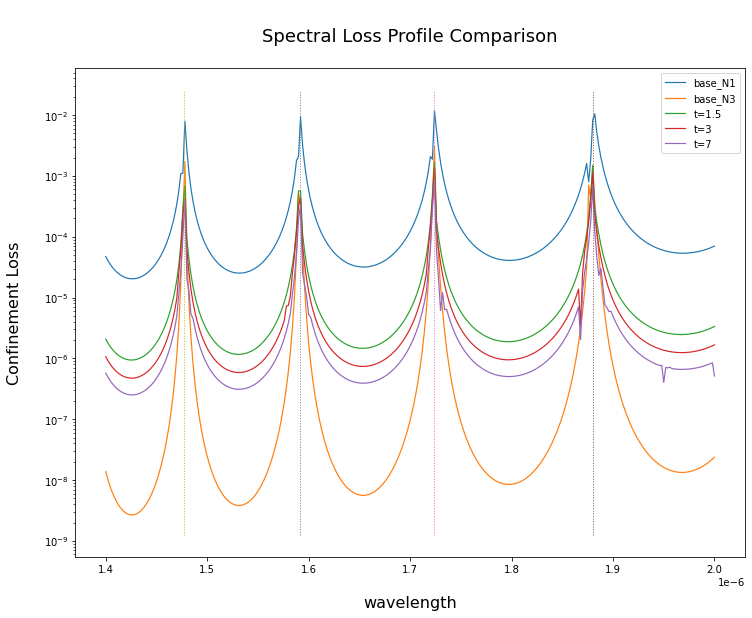

In [49]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N1betas.imag, linewidth=1.2, label='base_N1')
ax.plot(wls, -betas0.imag, linewidth=1.2, label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=1.5')
ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=3')
ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=7')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Last one I'll do

In [50]:
betas4 = np.zeros_like(wls, dtype=complex)

t1 = 10
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas3
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas4[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33349559920272-5.739132149431636e-07j) . Residual of determinant:  874.1429756808777 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23742390817148-4.976824379348688e-07j) . Residual of determinant:  1154.1959545463592 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14153622879887-2.9365189559789274e-07j) . Residual of determinant:  9.915899280555981e-08 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04601289661385-2.6486190650784637e-07j) . Residual of determinant:  2.314845052554645e-07 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95084902943418-3.5936113597922594e-07j) . Residual of determinant:  2181.210631331528 


     --------------------  

Scaled beta:  (63.521217783509314-9.138161481002219e-07j) . Residual of determinant:  7.236615441419107e-11 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (63.43601819670569-2.7554790806645275e-06j) . Residual of determinant:  1.33347991289693e-10 


     --------------------  45/301: wavelength: 1.488e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.35072870635597-1.904700903298583e-06j) . Residual of determinant:  2.521773771427431e-09 


     --------------------  46/301: wavelength: 1.49e-06  --------------------     

Scaled beta:  (63.265671569166436-1.402524787904424e-06j) . Residual of determinant:  3.714218830420884e-09 


     --------------------  47/301: wavelength: 1.4919999999999999e-06  --------------------     

Scaled beta:  (63.1808444903335-1.082629653981356e-06j) . Residual of determinant:  4.92997243308554e-09 


     --------------------  48/301:

Scaled beta:  (60.271694388446946-5.580589760467434e-07j) . Residual of determinant:  5.092349958020337e-08 


     --------------------  84/301: wavelength: 1.566e-06  --------------------     

Scaled beta:  (60.19470189467284-6.400657195857888e-07j) . Residual of determinant:  3.05157635667502e-08 


     --------------------  85/301: wavelength: 1.5679999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.11790540997222-7.452397153039827e-07j) . Residual of determinant:  1.8740607604090672e-08 


     --------------------  86/301: wavelength: 1.57e-06  --------------------     

Scaled beta:  (60.041304074828375-8.828559726503715e-07j) . Residual of determinant:  3.806604016953937e-09 


     --------------------  87/301: wavelength: 1.572e-06  --------------------     

scaling guess: 1
Scaled beta:  (59.96489698797756-1.0673379171279241e-06j) . Residual of determinant:  1.7705242903165715e-08 


     --------------------  88/301: wavelength: 1.57399999999

Scaled beta:  (57.1296708256453-2.728516230717339e-07j) . Residual of determinant:  1.6374148382688223e-07 


     --------------------  127/301: wavelength: 1.652e-06  --------------------     

Scaled beta:  (57.060491008121936-2.7186885881824526e-07j) . Residual of determinant:  5.586889951293376e-08 


     --------------------  128/301: wavelength: 1.654e-06  --------------------     

Scaled beta:  (56.991478476615136-2.72123159521814e-07j) . Residual of determinant:  6.371602864804056e-08 


     --------------------  129/301: wavelength: 1.656e-06  --------------------     

Scaled beta:  (56.922632620668686-2.7360570293892734e-07j) . Residual of determinant:  1.0973033997623445e-07 


     --------------------  130/301: wavelength: 1.6579999999999998e-06  --------------------     

Scaled beta:  (56.85395283278855-2.7632980973226494e-07j) . Residual of determinant:  2.0853382753383956e-08 


     --------------------  131/301: wavelength: 1.6599999999999998e-06  --------------

scaling guess: 1
Scaled beta:  (54.55249447747635-2.021091629870114e-05j) . Residual of determinant:  2.599035579470441e-11 


     --------------------  166/301: wavelength: 1.73e-06  --------------------     

Scaled beta:  (54.487225408846584-7.288342819294176e-06j) . Residual of determinant:  2.130882797308435e-11 


     --------------------  167/301: wavelength: 1.7319999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (54.42444319370102-7.38612730334706e-06j) . Residual of determinant:  6.494363520862377e-11 


     --------------------  168/301: wavelength: 1.7339999999999998e-06  --------------------     

Scaled beta:  (54.361256098359505-1.1226014052860936e-06j) . Residual of determinant:  6.088511055860825e-11 


     --------------------  169/301: wavelength: 1.736e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.29897709399723-3.8656651774837866e-06j) . Residual of determinant:  1.6420710278437907e-10 


     ----

Scaled beta:  (52.13603323861025-3.700264741981202e-07j) . Residual of determinant:  1.4158518884007434e-08 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.0784087312863-3.779247544256618e-07j) . Residual of determinant:  5.732570941353239e-08 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.02091139049836-3.872588074086197e-07j) . Residual of determinant:  6.921601845905606e-08 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

Scaled beta:  (51.963540791692765-3.981452452403837e-07j) . Residual of determinant:  1.7210749049108684e-08 


     --------------------  209/301: wavelength: 1.8159999999999999e-06  --------------------     

Scaled beta:  (51.90629651186354-4.1072596589210415e-07j) . Residual of determinant:  7.39190734086288e-08 


     --------------------  210/

scaling guess: 1
Scaled beta:  (49.981618968931315-2.196005275510734e-05j) . Residual of determinant:  8.891092648412663e-11 


     --------------------  245/301: wavelength: 1.888e-06  --------------------     

Scaled beta:  (49.926309306064965-1.044400753703399e-05j) . Residual of determinant:  3.4252607093671673e-13 


     --------------------  246/301: wavelength: 1.89e-06  --------------------     

scaling guess: 1
Scaled beta:  (49.87408768530827-1.1925175933054395e-05j) . Residual of determinant:  2.230222336724779e-11 


     --------------------  247/301: wavelength: 1.8919999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (49.82049329749492-2.1281840409970776e-06j) . Residual of determinant:  3.596917169644509e-11 


     --------------------  248/301: wavelength: 1.894e-06  --------------------     

Scaled beta:  (49.76778376039045-1.1655274722767126e-06j) . Residual of determinant:  5.870637128208026e-11 


   

Scaled beta:  (47.94495462794833-4.5767277535284883e-07j) . Residual of determinant:  2.3649685139608118e-08 


     --------------------  285/301: wavelength: 1.9679999999999996e-06  --------------------     

Scaled beta:  (47.89621451434237-4.5804553805479447e-07j) . Residual of determinant:  3.897308963218699e-08 


     --------------------  286/301: wavelength: 1.9699999999999998e-06  --------------------     

Scaled beta:  (47.847959858010036-4.3709522477782014e-07j) . Residual of determinant:  9.187912484319844e-08 


     --------------------  287/301: wavelength: 1.972e-06  --------------------     

Scaled beta:  (47.804024918242995-8.135420300074805e-08j) . Residual of determinant:  7.251383497324944e-06 


     --------------------  288/301: wavelength: 1.974e-06  --------------------     

Scaled beta:  (47.75058664657193-4.653622760697065e-07j) . Residual of determinant:  2.0674432191492993e-08 


     --------------------  289/301: wavelength: 1.976e-06  --------------

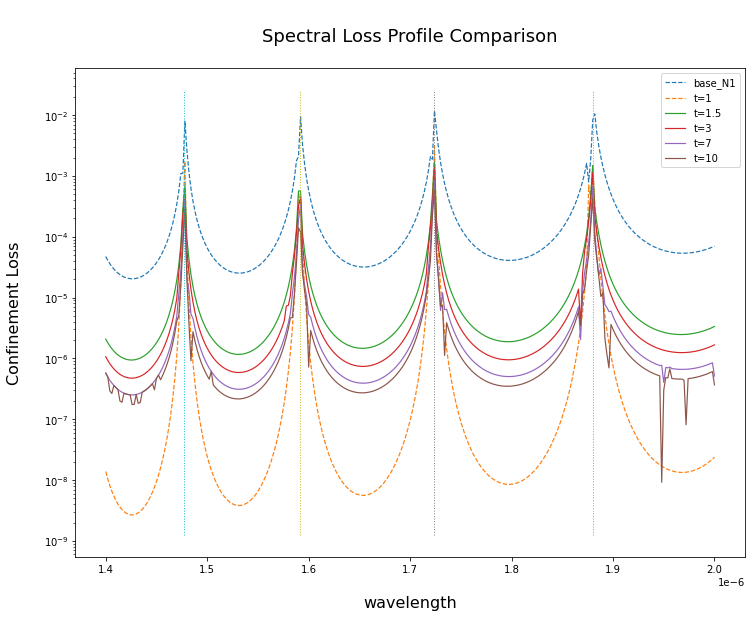

In [55]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N1betas.imag, linewidth=1.2, linestyle='--', label='base_N1')
ax.plot(wls, -betas0.imag, linewidth=1.2,  linestyle='--', label='t=1')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=1.5')
ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=3')
ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=7')
ax.plot(wls, -betas4.imag, linewidth=1.2, label='t=10')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')
